In [1]:
%%capture
import os
for dirname, _, filename in os.walk("../input"):
  for files in filename:
    print(os.path.join(dirname, files))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
from tqdm import tqdm_notebook as tqdm

In [3]:
train_data = pd.DataFrame(pd.read_csv("../input/plant-pathology-2020-fgvc7/train.csv"))
test_data = pd.DataFrame(pd.read_csv("../input/plant-pathology-2020-fgvc7/test.csv"))

In [4]:
print("Training data shape : = {}".format(train_data.shape))
print("Test data shape : = {}".format(test_data.shape))

Training data shape : = (1821, 5)
Test data shape : = (1821, 1)


In [5]:
train_data.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [6]:
test_data.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [7]:
image_folder_path = "../input/plant-pathology-2020-fgvc7/images/"

In [8]:
arr = train_data["image_id"]
train_images = [i for i in arr]  

arr = test_data["image_id"]
test_images = [i for i in arr]

In [9]:
def load_image(image_id) : 
  image_path = image_folder_path +image_id +".jpg"
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def resize(image):
  image = cv2.resize(image, (800, 800))
  return image

In [10]:
def extract_classes(s):
  """
  s can be either of the four classes mentioned above.
  """ 
  t = train_data[train_data[s] == 1] 
  arr = t["image_id"]
  images = [i for i in tqdm(arr)]
  train_images = [load_image(i) for i in tqdm(images)]
  return train_images

classes = ["healthy", "multiple_diseases", "rust", "scab"] 

In [11]:
count_healthy = len(train_data[train_data["healthy"] == 1])
count_diseased = len(train_data[train_data["multiple_diseases"] == 1])
count_rust = len(train_data[train_data["rust"] == 1])
count_scab = len(train_data[train_data["scab"] == 1])

print(count_healthy)
print(count_diseased)
print(count_rust)
print(count_scab)
print(count_healthy + count_diseased + count_rust +  count_scab)

516
91
622
592
1821


(-1.1527958829887197,
 1.1533529919548287,
 -1.1585919775752163,
 1.1357509855075638)

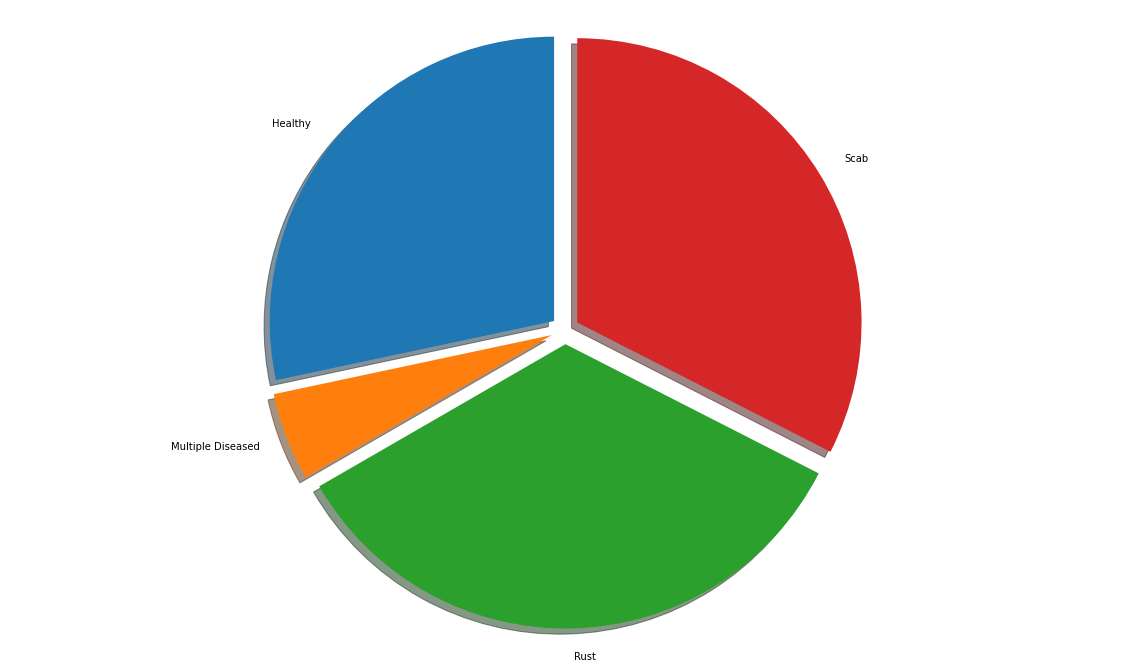

In [12]:
# observe number of cases present in each class
labels = ["Healthy", "Multiple Diseased", "Rust", "Scab"]
counts = [count_healthy, count_diseased, count_rust, count_scab]
explode = (0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(figsize = (20, 12))
ax.pie(counts, explode = explode, labels = labels, shadow = True, startangle = 90)
ax.axis("equal") # equal aspect ratio ensures pie graph is drawn as circle

In [13]:
red , green, blue = [], [], []

In [14]:
healthy = extract_classes("healthy")
for image in healthy :
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
    
healthy_image_1 = healthy[100]
healthy_image_2 = healthy[200]
healthy_image_3 = healthy[300]
del healthy # free memory

md = extract_classes("multiple_diseases")
for image in md : 
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
md_image_1 = md[1]
md_image_2 = md[5]
md_image_3 = md[10]
del md # free memory

rust = extract_classes("rust")
for image in rust : 
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
rust_image_1 = rust[10]
rust_image_2 = rust[20] 
rust_image_3 = rust[30]
del rust # free memory

scab = extract_classes("healthy")
for image in scab : 
    mean_red = np.mean(image[:,:,0])
    mean_green = np.mean(image[:,:,1])
    mean_blue = np.mean(image[:,:,2])
    
    red.append(mean_red)
    green.append(mean_green)
    blue.append(mean_blue)
scab_image_1 = scab[10]
scab_image_2 = scab[20]
scab_image_3 = scab[30] 
del scab # free memory

image_collection = [healthy_image_1, healthy_image_2, healthy_image_3, 
                   md_image_1, md_image_2, md_image_3,
                   rust_image_1, rust_image_2, rust_image_3,
                   scab_image_1, scab_image_2, scab_image_3]   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


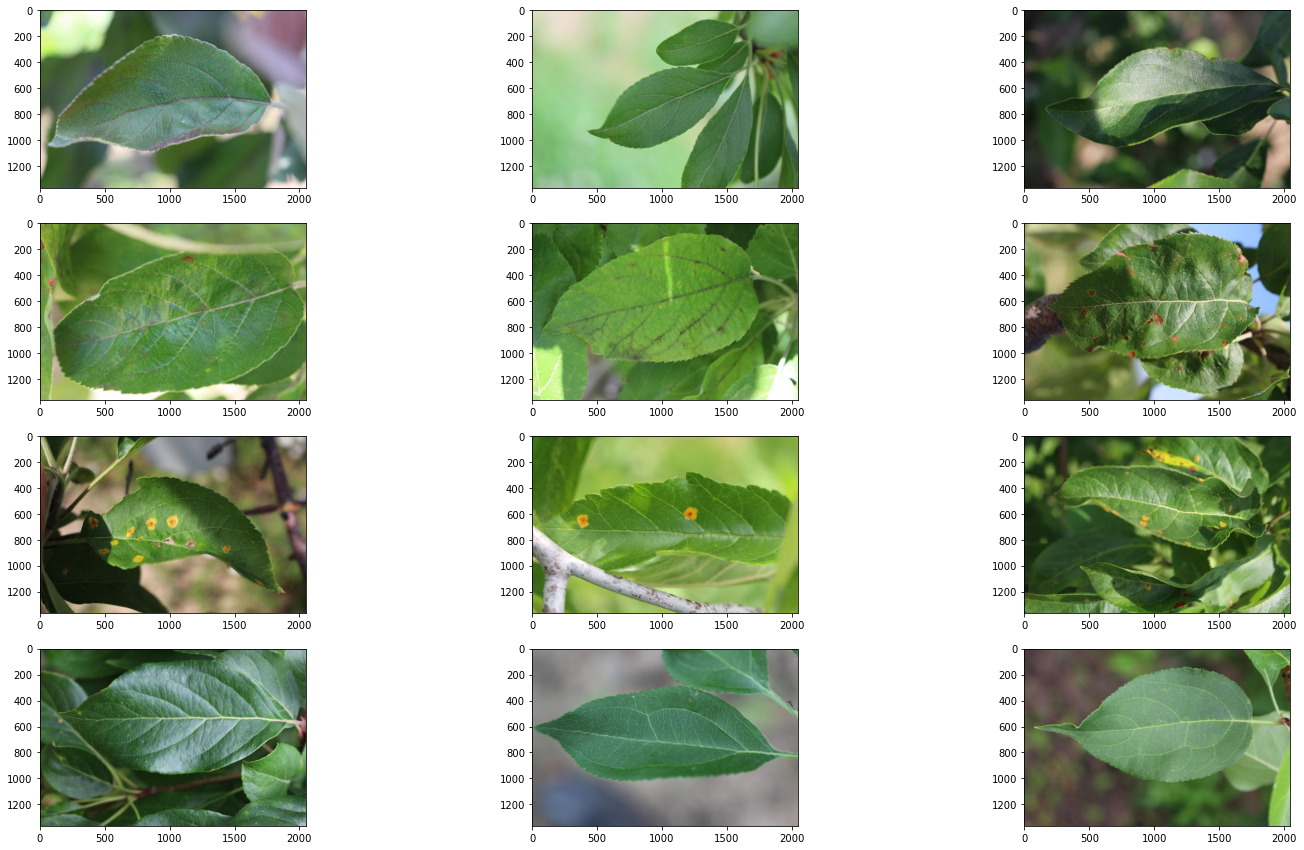

In [15]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (25, 15))
for i in range(12):
    ax[i//3, i%3].imshow(image_collection[i]) 

**Inference** : 
* Rust leaves has brownish- yellowish patches
* Scab leaves have brown stains.

The range of spread = 121.38


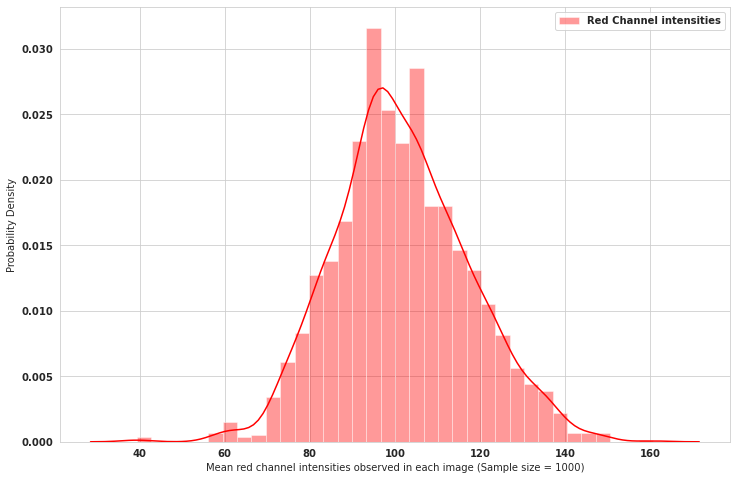

In [16]:
# red channel plot
range_of_spread = max(red) - min(red)
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(red,  hist = True, kde = True, label = "Red Channel intensities", color = "r")
fig.set(xlabel = "Mean red channel intensities observed in each image (Sample size = 1000)", ylabel = "Probability Density")
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

The range of spread = 98.29


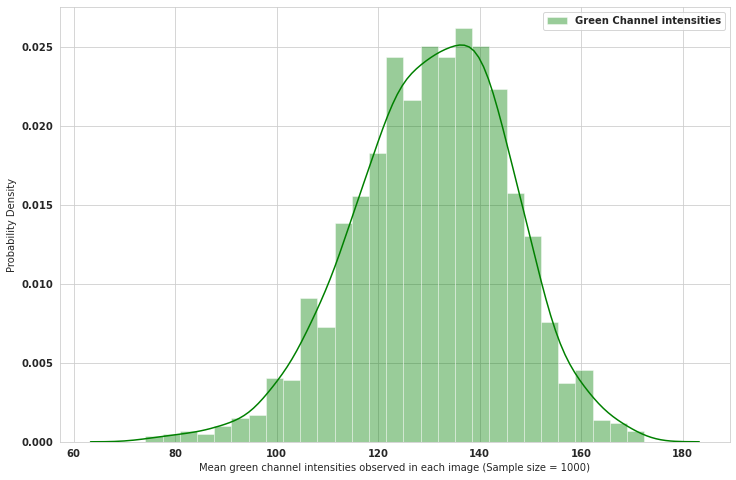

In [17]:
# Green channel plot
range_of_spread = max(green) - min(green)
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(green,  hist = True, kde = True, label = "Green Channel intensities", color = "g")
fig.set(xlabel = "Mean green channel intensities observed in each image (Sample size = 1000)", ylabel = "Probability Density")
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

The range of spread = 99.43


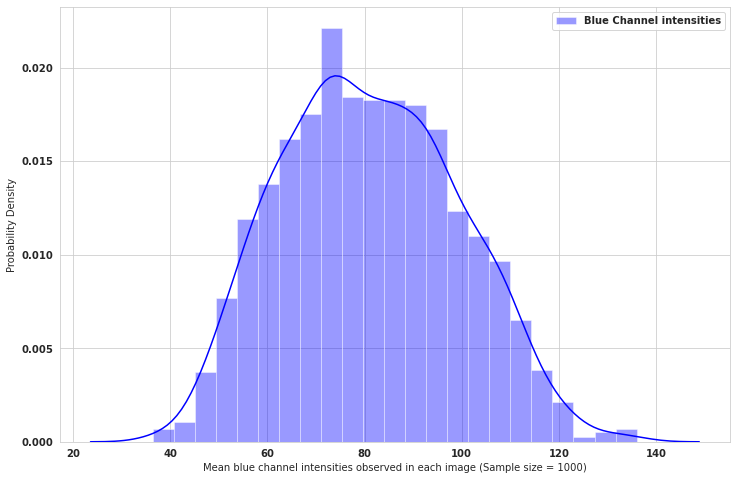

In [18]:
# Blue channel plot
range_of_spread = max(blue) - min(blue)
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(blue,  hist = True, kde = True, rug = False, label = "Blue Channel intensities", color = "b")
fig.set(xlabel = "Mean blue channel intensities observed in each image (Sample size = 1000)", ylabel = "Probability Density")
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

**Inference** : 

* Red channel has positive skew, meaning the values are more concentrated at intensities lower than mean(somewhere around 90).
* Green channel is negative skew, meaning the values are more concentrated at intentities higher than mean(somewhere in the range 130-150). This also means that green channel is more pronounced than red in the sample image set; and thereby the whole data set as they come from the same distribution. This makes sense as images are that of leaves!
* Similarily, blue channel has a slight positive skew and is very well distributed.

# IMAGE PRE-PROCESSING

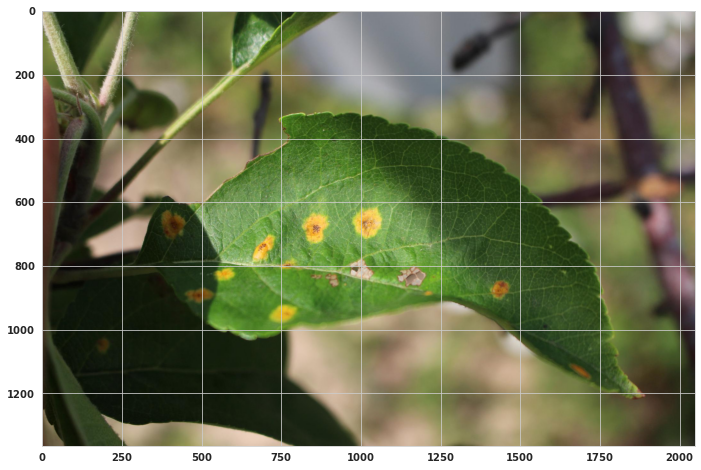

In [19]:
sample_image = rust_image_1
plt.figure(figsize = (12, 8))
plt.imshow(sample_image)

In [20]:
def gaussian_blur(image):
  filtered_image = cv2.GaussianBlur(image, (5,5), 0)
  return filtered_image

### Edge detection : 
Edge detection is one of the fundamental operation in image processing. Using this, we can reduce the amount of pixels while maintaining the structural aspect of the images. This can be done using :

* First derivative based Sobel filter(for thicker edges)
* Second derivative based Laplacian filter(for finer edges)

Here, we want to consider the area containing only the leaf, while ignoring the background green. Hence, we use Sobel filter to identify the prominent edge of the leaf.

In [21]:
def sobel_edge_detection(image):
  """
  Using Sobel filter

  Sobel filter takes the following arguments : 
  1. Original Image
  2. Depth of the destination image
  3. Order of derivative x
  4. Order of derivative y
  5. Kernel size for convolutions

  f(Image, depth, order_dx, order_dy, kernel_size) 
  """
  sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 5)
  sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 5)
  return sobel_x, sobel_y

(-0.5, 2047.5, 1364.5, -0.5)

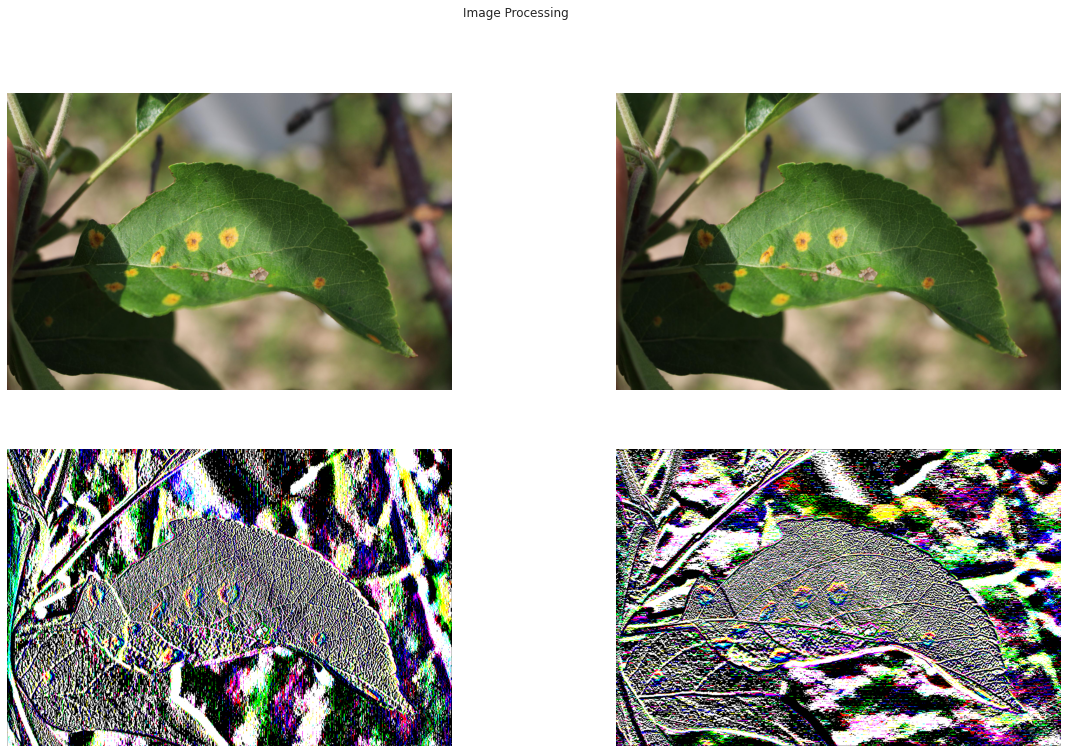

In [22]:
f_img = gaussian_blur(sample_image)
s_img_x, s_img_y = sobel_edge_detection(sample_image)

fig, axs= plt.subplots(2,2, figsize = (20, 12))
fig.suptitle("Image Processing")
axs[0,0].imshow(sample_image, cmap = "gray")
axs[0,0].axis(False)
axs[0,1].imshow(f_img, cmap = "gray")
axs[0,1].axis(False)
axs[1,0].imshow(s_img_x, cmap = "gray")
axs[1,0].axis(False)
axs[1,1].imshow(s_img_y, cmap = "gray")
axs[1,1].axis(False)

Using sobel filter we found the edges, however for further pre-processing we aim to consider only the area of the leaf, that is the fine textured area we see in the gradient images. For that, we will use a much powerful inbuilt function of open-CV called Canny(). This function will return the edge coordinates.

Entire read is available on the OpenCV webpage :

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html#canny

In [23]:
from collections import deque
def canny_edge_detection(image):
  edges = cv2.Canny(image, 100, 200) 
  return edges

def primary_roi(original_image, edge_image):
  edge_coordinates = deque()
  for i in tqdm(range(edge_image.shape[0])):
    for j in range(edge_image.shape[1]):
      if edge_image[i][j] != 0 :
        edge_coordinates.append((i, j))
  
  min_row = edge_coordinates[np.argsort([coordinate[0] for coordinate in edge_coordinates])[0]][0]
  max_row = edge_coordinates[np.argsort([coordinate[0] for coordinate in edge_coordinates])[-1]][0]
  min_col = edge_coordinates[np.argsort([coordinate[1] for coordinate in edge_coordinates])[0]][1]
  max_col = edge_coordinates[np.argsort([coordinate[1] for coordinate in edge_coordinates])[-1]][1]
  
  new_image = original_image.copy()
  new_edge_image = edge_image.copy()
  
  new_image[min_row - 10 : min_row + 10, min_col : max_col] = [255, 0, 0]
  new_image[max_row - 10 : max_row + 10, min_col : max_col] = [255, 0, 0]
  new_image[min_row : max_row , min_col - 10 : min_col + 10] = [255, 0, 0]
  new_image[min_row : max_row , max_col - 10 : max_col + 10] = [255, 0, 0]

  new_edge_image[min_row - 10 : min_row + 10, min_col : max_col] = [255]
  new_edge_image[max_row - 10 : max_row + 10, min_col : max_col] = [255]
  new_edge_image[min_row : max_row , min_col - 10 : min_col + 10] = [255]
  new_edge_image[min_row : max_row , max_col - 10 : max_col + 10] = [255]

  roi_image = new_image[min_row : max_row, min_col : max_col]
  edge_roi_image = new_edge_image[min_row : max_row, min_col : max_col]
  
  
  return roi_image, edge_roi_image

(-0.5, 2047.5, 1364.5, -0.5)

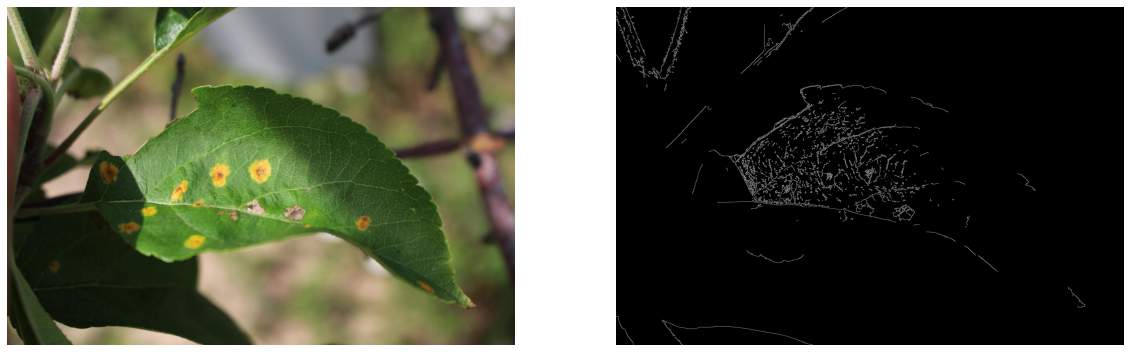

In [24]:
fig, axs= plt.subplots(1,2 , figsize = (20, 12))
axs[0].imshow(sample_image, cmap = "gray")
axs[0].axis(False)

edge_image = canny_edge_detection(sample_image) 
axs[1].imshow(edge_image, cmap = "gray")
axs[1].axis(False)

In [25]:
print(sample_image.shape)
print(edge_image.shape)

(1365, 2048, 3)
(1365, 2048)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


(-0.5, 1890.5, 1363.5, -0.5)

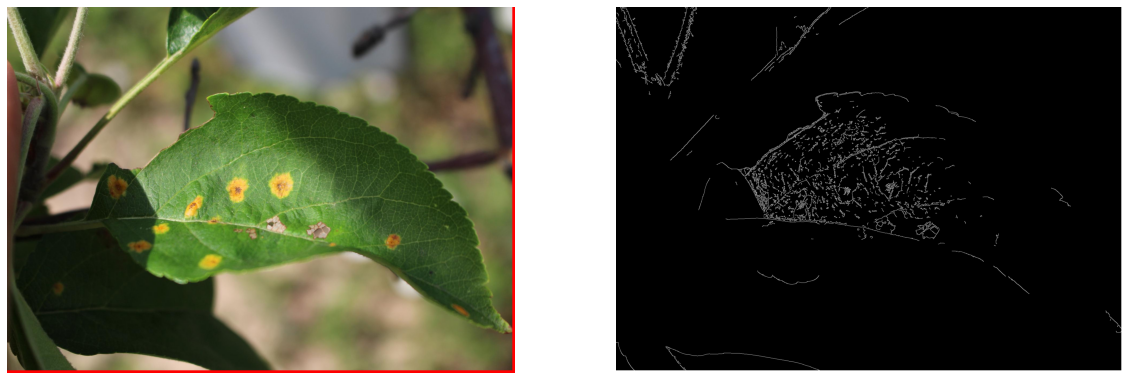

In [26]:
roi_image, edge_roi_image = primary_roi(sample_image, edge_image)

fig, axs= plt.subplots(1,2 , figsize = (20, 12))
axs[0].imshow(roi_image, cmap = "gray")
axs[0].axis(False)

axs[1].imshow(edge_roi_image, cmap = "gray")
axs[1].axis(False)

## Histogram Equalization in ROI section of the whole image
### First of all, why can we not apply histogram equalization directly to an RGB image?
Histogram equalization is a non-linear process. Channel splitting and equalizing each channel separately is incorrect. Equalization involves intensity values of the image, not the color components. So for a simple RGB color image, histogram equalization cannot be applied directly on the channels. It needs to be applied in such a way that the intensity values are equalized without disturbing the color balance of the image. So, the first step is to convert the color space of the image from RGB into one of the color spaces that separates intensity values from color components. Some of the possible options are HSV/HLS, YUV, YCbCr, etc. YCbCr is preferred as it is designed for digital images. Perform histogram equalization on the intensity plane Y. Now convert the resultant YCbCr image back to RGB.

(Excerpt taken from :

https://prateekvjoshi.com/2013/11/22/histogram-equalization-of-rgb-images/ )

In [27]:
def histogram_equalization(roi_image):
  image_ycrcb = cv2.cvtColor(roi_image, cv2.COLOR_RGB2YCR_CB)
  y_channel = image_ycrcb[:, :, 0] # apply histogram equalization on this channel
  cr_channel = image_ycrcb[:, :, 1]
  cb_channel = image_ycrcb[:, :, 2]
  # local histogram equalization
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  equalized = clahe.apply(y_channel)
  equalized_image = cv2.merge([equalized, cr_channel, cb_channel])
  equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_YCR_CB2RGB)
  return equalized_image

(-0.5, 1890.5, 1363.5, -0.5)

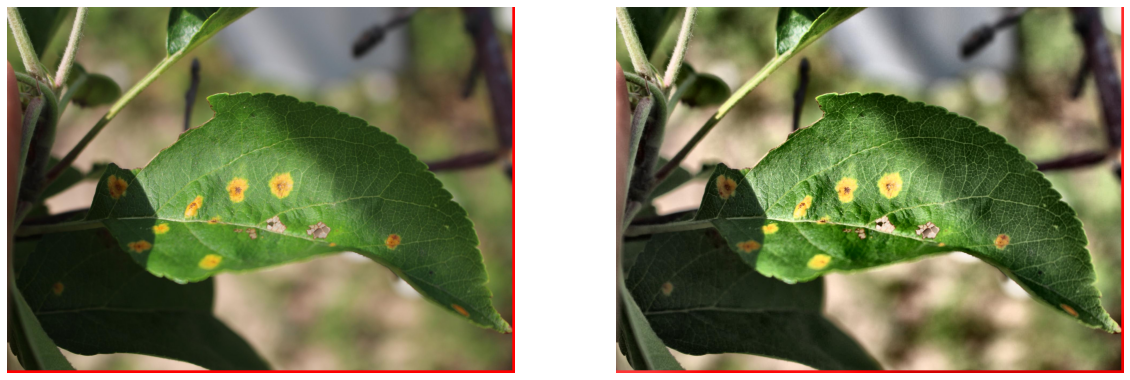

In [28]:
equalized_roi_image = histogram_equalization(roi_image)
fig, axs= plt.subplots(1,2 , figsize = (20, 12))

axs[0].imshow(roi_image, cmap = "gray")
axs[0].axis(False)

axs[1].imshow(equalized_roi_image, cmap = "gray")
axs[1].axis(False)